## Feature extraction, training, evaluation and validation
The next task at hand is feature extraction and training the classification models to classify Negative , Positive and Neutral tweets.

The steps to be followed are :
- import TfidfVectorizer() and implement stopword removal
- apply the train and test split
- use the various models for classification including Naive Bayes ,K-nearest and Linear SVC algorithms
- Test the algorithms and Validate the models using the validation set 

In [1]:
import pandas as pd 


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer= TfidfVectorizer(stop_words='english')

The next step is to import the Twitter Sentiment Analysis for more information see [Kaggle source](https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis)

In [3]:
df = pd.read_csv('/workspaces/Twitter-Sentiment-Analysis---NLP-with-generic-machine-learning/Notebooks/twitter_training_cleaned.csv')
df.columns

Index(['Unnamed: 0', 'Tweet ID', 'Entity', 'Sentiment', 'Tweet content'], dtype='object')

In [4]:
df= df.drop('Unnamed: 0', axis=1)

In [5]:
df

,Tweet ID,Entity,Sentiment,Tweet content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
60976,9200,Nvidia,Positive,Just realized that the Windows partition of my...
60977,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
60978,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
60979,9200,Nvidia,Positive,Just realized between the windows partition of...


Now we split the data training and test sets 

In [6]:
from sklearn.model_selection import train_test_split

X = df['Tweet content']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

To smoothly run all processes across the three algorithms I created Pipelines for each machine learning algorithm after importing them from their respective libraries.

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm  import LinearSVC

In [8]:
pipeNB = Pipeline([('tf_vectorizer',tf_vectorizer), ('Naive_bayes',MultinomialNB())])
pipeKNN = Pipeline([('tf_vectorizer',tf_vectorizer),('KNN',KNeighborsClassifier())])
pipeSVC = Pipeline([('tf_vectorizer',tf_vectorizer),('LinearSVC',LinearSVC())])

To start with we have the Multinomial Naive Bayes

In [9]:
pipeNB.fit(X_train,y_train)

,steps,"[('tf_vectorizer', ...), ('Naive_bayes', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report


To avoid rewriting all the evaluation processes I made the Evaluate function which takes the model, X for the x test data, and y for the y test data.

In [11]:
def Evaluate(model, X, y):
    y_pred = model.predict(X)
    cm = confusion_matrix(y,y_pred)
    CM = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model.classes_)
    CM.plot()

    print(classification_report(y,y_pred))


    

The most notable parameters used by the Naive Bayes pipeline are:
- stop words removal set to english 
- the alpha value for the naive bayes set to 1.0
- the model was also set to learn class prior probabilities

In [12]:
pipeNB.get_params()

{'memory': None,
 'steps': [('tf_vectorizer', TfidfVectorizer(stop_words='english')),
  ('Naive_bayes', MultinomialNB())],
 'transform_input': None,
 'verbose': False,
 'tf_vectorizer': TfidfVectorizer(stop_words='english'),
 'Naive_bayes': MultinomialNB(),
 'tf_vectorizer__analyzer': 'word',
 'tf_vectorizer__binary': False,
 'tf_vectorizer__decode_error': 'strict',
 'tf_vectorizer__dtype': numpy.float64,
 'tf_vectorizer__encoding': 'utf-8',
 'tf_vectorizer__input': 'content',
 'tf_vectorizer__lowercase': True,
 'tf_vectorizer__max_df': 1.0,
 'tf_vectorizer__max_features': None,
 'tf_vectorizer__min_df': 1,
 'tf_vectorizer__ngram_range': (1, 1),
 'tf_vectorizer__norm': 'l2',
 'tf_vectorizer__preprocessor': None,
 'tf_vectorizer__smooth_idf': True,
 'tf_vectorizer__stop_words': 'english',
 'tf_vectorizer__strip_accents': None,
 'tf_vectorizer__sublinear_tf': False,
 'tf_vectorizer__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tf_vectorizer__tokenizer': None,
 'tf_vectorizer__use_idf': True,
 

Evaluation of the naive bayes algorithm was average across the board with an accuracy of 81 %.

              precision    recall  f1-score   support

    Negative       0.77      0.91      0.83      4487
     Neutral       0.90      0.67      0.77      3706
    Positive       0.81      0.84      0.82      4004

    accuracy                           0.81     12197
   macro avg       0.83      0.81      0.81     12197
weighted avg       0.82      0.81      0.81     12197



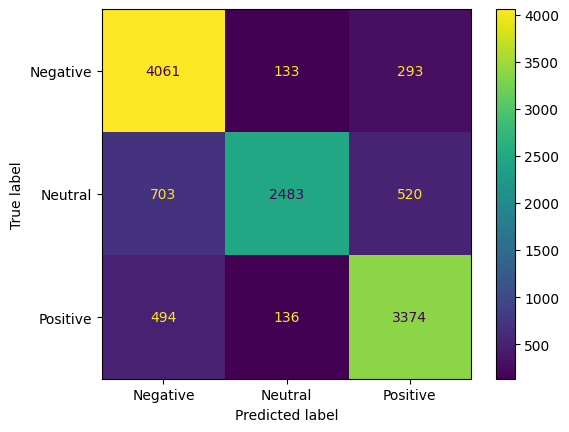

In [13]:
Evaluate(pipeNB,X_test,y_test)

Next step is to train the K nearest Neighbors algorithm.

In [14]:
pipeKNN.fit(X_train,y_train)

,steps,"[('tf_vectorizer', ...), ('KNN', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


The most noatble parameters from the KNN pipeline were:
- the removal of stopwords set to True
- K in KNN set to 5 
- The weights of the points was set to uninform 

In [15]:
pipeKNN.get_params()

{'memory': None,
 'steps': [('tf_vectorizer', TfidfVectorizer(stop_words='english')),
  ('KNN', KNeighborsClassifier())],
 'transform_input': None,
 'verbose': False,
 'tf_vectorizer': TfidfVectorizer(stop_words='english'),
 'KNN': KNeighborsClassifier(),
 'tf_vectorizer__analyzer': 'word',
 'tf_vectorizer__binary': False,
 'tf_vectorizer__decode_error': 'strict',
 'tf_vectorizer__dtype': numpy.float64,
 'tf_vectorizer__encoding': 'utf-8',
 'tf_vectorizer__input': 'content',
 'tf_vectorizer__lowercase': True,
 'tf_vectorizer__max_df': 1.0,
 'tf_vectorizer__max_features': None,
 'tf_vectorizer__min_df': 1,
 'tf_vectorizer__ngram_range': (1, 1),
 'tf_vectorizer__norm': 'l2',
 'tf_vectorizer__preprocessor': None,
 'tf_vectorizer__smooth_idf': True,
 'tf_vectorizer__stop_words': 'english',
 'tf_vectorizer__strip_accents': None,
 'tf_vectorizer__sublinear_tf': False,
 'tf_vectorizer__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tf_vectorizer__tokenizer': None,
 'tf_vectorizer__use_idf': True,
 't

The Evaluation of the KNN model is done below and shows a substantial improvement from the Naive Bayes theorem , performance was high accross the board with an overall accuracy of 91 %.

              precision    recall  f1-score   support

    Negative       0.92      0.92      0.92      4487
     Neutral       0.91      0.90      0.91      3706
    Positive       0.89      0.91      0.90      4004

    accuracy                           0.91     12197
   macro avg       0.91      0.91      0.91     12197
weighted avg       0.91      0.91      0.91     12197



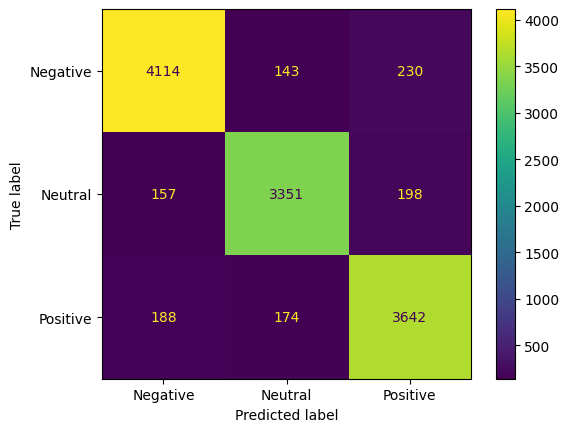

In [16]:
Evaluate(pipeKNN,X_test,y_test)

The next algorithm was the LinearSVC algorithm.

In [17]:
pipeSVC.fit(X_train, y_train)

,steps,"[('tf_vectorizer', ...), ('LinearSVC', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


The most notable parameters from the LinearSVC algorithm which :
- the removal of stopwords set to True
- L2 / Ridge regression was used
- One-versus-rest multi class strategy used
This algoritm uses a linear kernel apart from its regular SVC counterpart

In [18]:
pipeSVC.get_params()

{'memory': None,
 'steps': [('tf_vectorizer', TfidfVectorizer(stop_words='english')),
  ('LinearSVC', LinearSVC())],
 'transform_input': None,
 'verbose': False,
 'tf_vectorizer': TfidfVectorizer(stop_words='english'),
 'LinearSVC': LinearSVC(),
 'tf_vectorizer__analyzer': 'word',
 'tf_vectorizer__binary': False,
 'tf_vectorizer__decode_error': 'strict',
 'tf_vectorizer__dtype': numpy.float64,
 'tf_vectorizer__encoding': 'utf-8',
 'tf_vectorizer__input': 'content',
 'tf_vectorizer__lowercase': True,
 'tf_vectorizer__max_df': 1.0,
 'tf_vectorizer__max_features': None,
 'tf_vectorizer__min_df': 1,
 'tf_vectorizer__ngram_range': (1, 1),
 'tf_vectorizer__norm': 'l2',
 'tf_vectorizer__preprocessor': None,
 'tf_vectorizer__smooth_idf': True,
 'tf_vectorizer__stop_words': 'english',
 'tf_vectorizer__strip_accents': None,
 'tf_vectorizer__sublinear_tf': False,
 'tf_vectorizer__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tf_vectorizer__tokenizer': None,
 'tf_vectorizer__use_idf': True,
 'tf_vectoriz

The LinearSVC algorithm gave a good accuracy score of 90%, with consistant performance across al the labels

              precision    recall  f1-score   support

    Negative       0.91      0.91      0.91      4487
     Neutral       0.93      0.86      0.90      3706
    Positive       0.86      0.92      0.89      4004

    accuracy                           0.90     12197
   macro avg       0.90      0.90      0.90     12197
weighted avg       0.90      0.90      0.90     12197



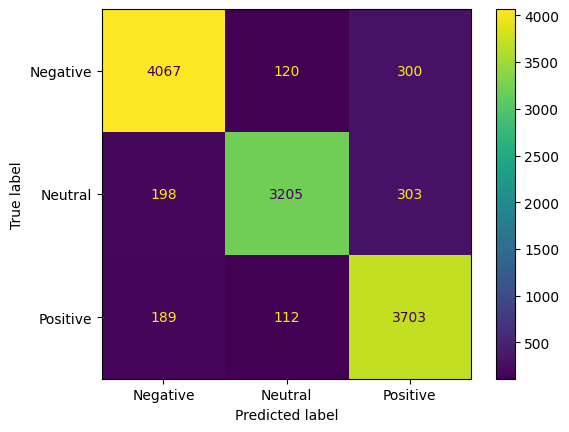

In [19]:
Evaluate(pipeSVC,X_test,y_test)

**For the part of training before Validation is training each model on the unsplit training set to squeeze out the last drops of learning.**

In [20]:
pipeNB.fit(X,y)


,steps,"[('tf_vectorizer', ...), ('Naive_bayes', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


I now imported the vadiation set and named it df1, this dataset will not be split and prediction and evaluation operations will only be done.

In [21]:
df1= pd.read_csv('/workspaces/Twitter-Sentiment-Analysis---NLP-with-generic-machine-learning/Notebooks/twitter_validation_clened.csv')

              precision    recall  f1-score   support

    Negative       0.81      0.93      0.87       266
     Neutral       0.94      0.76      0.84       285
    Positive       0.86      0.90      0.88       277

    accuracy                           0.86       828
   macro avg       0.87      0.87      0.86       828
weighted avg       0.87      0.86      0.86       828



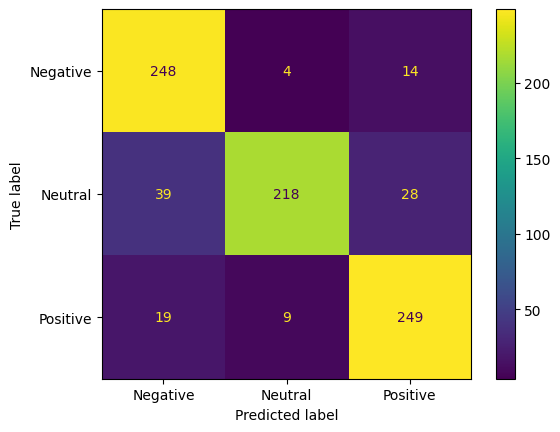

In [22]:
X_val= df1['Tweet content']
y_val= df1['Sentiment']


Evaluate(pipeNB,X_val,y_val)

In [23]:
pipeKNN.fit(X,y)

,steps,"[('tf_vectorizer', ...), ('KNN', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


              precision    recall  f1-score   support

    Negative       0.94      0.96      0.95       266
     Neutral       0.98      0.96      0.97       285
    Positive       0.96      0.96      0.96       277

    accuracy                           0.96       828
   macro avg       0.96      0.96      0.96       828
weighted avg       0.96      0.96      0.96       828



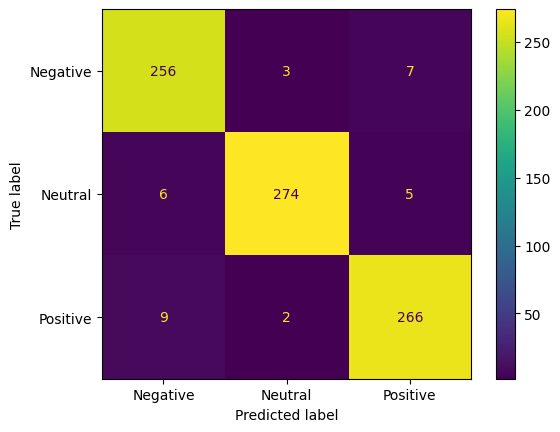

In [24]:
Evaluate(pipeKNN,X_val,y_val)

In [25]:
pipeSVC.fit(X,y)

,steps,"[('tf_vectorizer', ...), ('LinearSVC', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


              precision    recall  f1-score   support

    Negative       0.97      0.96      0.96       266
     Neutral       0.97      0.96      0.97       285
    Positive       0.95      0.96      0.96       277

    accuracy                           0.96       828
   macro avg       0.96      0.96      0.96       828
weighted avg       0.96      0.96      0.96       828



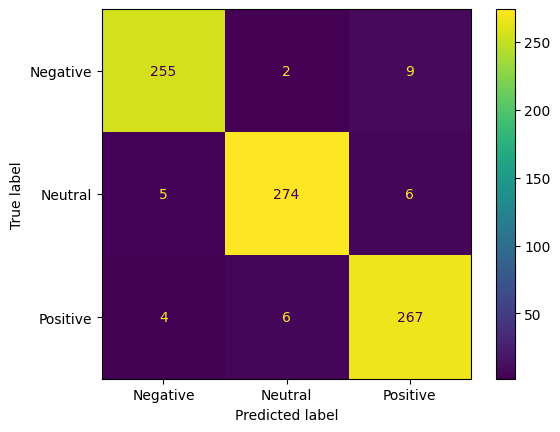

In [26]:
Evaluate(pipeSVC,X_val, y_val)

## The project was a success and the sentiment extraction was done upto and accuracy of 96% on unseen data. The algorithm can be used in interactions with customers and product users online as another application instaed of manual human analysis.  